<a href="https://colab.research.google.com/github/Sapir-Bar/Mathematical_and_Systems_Biology/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.subplots import make_subplots

# Question 1

### a) Write a function that computes the real part of a random matrix's "rightmost" eigenvalue


In [13]:
def generate_random_matrix(c,sigma,n,d):
    """
    n: Dimention
    c: Connectance
    d: Diagonal elements
    sigma: Standard deviation
    """
    M = np.zeros((n, n))
    random_numbers = np.random.normal(0, sigma, size=M.shape)
    mask = np.random.rand(n, n) < c
    M[mask] = random_numbers[mask]
    np.fill_diagonal(M, -d)
    return M

def rightmost_eigenvalue_real_part(M):
  """
  M: community matrix
  Computes the real part of the eigenvalue of M with the largest real part.
  """
  eigenvalues = np.linalg.eigvals(M)
  rightmost_real = np.max(np.real(eigenvalues))
  return rightmost_real

### b) Set 𝑑 = 10 and choose parameters 𝐶, 𝜎 and 𝑛 such that you are close to the critical point (make sure 𝐶𝑛 > 10). Draw 1000 random matrices and compute the probability drawing a stable matrix.



In [9]:
def is_stable(M):
    eigenvalues = np.linalg.eigvals(M)
    return np.all(np.real(eigenvalues) < 0)

def estimate_stability_probability(c, sigma, n, d, num_trials=30):
    count_stable = 0
    for _ in range(num_trials):
        M = generate_random_matrix(c, sigma, n, d)
        if is_stable(M):
            count_stable += 1
    return count_stable / num_trials

In [20]:
epsilon = 0.01
c, n, d = 0.2, 100, 10
sigma = d / np.sqrt(n * c) + epsilon
probability = estimate_stability_probability(c, sigma, n, d, num_trials=1000)
print(f"The probability drawing a stable matrix is: {probability}")


The probability drawing a stable matrix is: 0.715


### c) Vary 𝐶, 𝜎 and 𝑛 making them cross the critical point. Draw a graph where the probability of stability is on the 𝑦 axis and $√𝑛𝐶𝜎^2$ on the 𝑥 axis. Explain the graph.




In [26]:
def around_critical_point(n, C, d, x_vals, trials=30):
    probs = []
    for x in x_vals:
        sigma = x / np.sqrt(n * C)
        prob = estimate_stability_probability(c, sigma, n, d, num_trials=30)
        probs.append(prob)
    return probs

c, n, d = 0.2, 100, 10
x_vals = np.linspace(d-5, d+5, 50)
probs = around_critical_point(n, c, d, x_vals, trials=30)

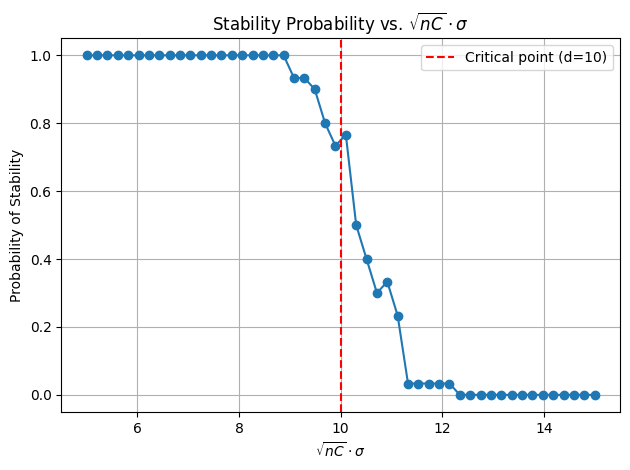

In [27]:
plt.plot(x_vals, probs, marker='o')
plt.axvline(x=d, color='red', linestyle='--', label='Critical point (d=10)')
plt.title('Stability Probability vs. $\\sqrt{nC} \\cdot \\sigma$')
plt.xlabel(r'$\sqrt{nC} \cdot \sigma$')
plt.ylabel('Probability of Stability')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Question 2

In [32]:
# Copied from practive 3
def GLV(t, x, r, A):
    """
    t: Time variable
    x: Array of species populations of shape (n,)
    r: Array of intrinsic growth rates of shape (n,)
    A: Interaction matrix of shape (n,n).
    Returns:
    dxdt: Derivative of x with respect to time of shape (n,)
    """
    return r * x + x * np.dot(A, x)

# draw r_i from uniform distribution
def growth_rate(min_growth, max_growth, n):
    return np.random.uniform(min_growth, max_growth, n).squeeze()

# define a non-symetric interaction matrix
def interaction_matrix(n, C, mean, sigma):
    """
    n: Number of species
    c: Connectance
    """
    interaction_matrix = np.zeros((n, n))
    random_numbers = np.random.normal(mean, sigma, size=interaction_matrix.shape)
    mask = np.random.rand(n, n) < C
    interaction_matrix[mask] = random_numbers[mask]
    np.fill_diagonal(interaction_matrix, -1)
    return interaction_matrix

def set_initial_condition(n):
    return np.random.uniform(0, 1, n)

In [151]:
# parameters
n =25
C = 0.5
min_growth, max_growth = 0, 1
mean, sigma = 0, 0.5
t_span = (0, 100)
x0 = set_initial_condition(n)
r = growth_rate(min_growth, max_growth, n)
A = interaction_matrix(n, C, mean, sigma)

# solution
sol = solve_ivp(GLV, t_span, x0, args=(r, A), dense_output=True)

In [100]:
min_per_species = np.min(sol.y, axis=1)
extinct_species = np.where(min_per_species < 1e-6)[0]
print("Species that (numerically) went extinct:", extinct_species.size)

Species that (numerically) went extinct: 1


In [152]:
fig = go.Figure()

for i in range(n):
    fig.add_trace(go.Scatter(x=sol.t, y=sol.y[i], mode='lines'))

fig.update_layout(
    title='Generalized Lotka-Volterra model',
    xaxis_title='t',
    yaxis_title='x',
    showlegend=False,
    height=600,
    width=600,
    plot_bgcolor='white',
    xaxis=dict(
        showgrid=False,
        linecolor='black'
    ),
    yaxis=dict(
        showgrid=False,
        linecolor='black'
    )
)

fig.show()

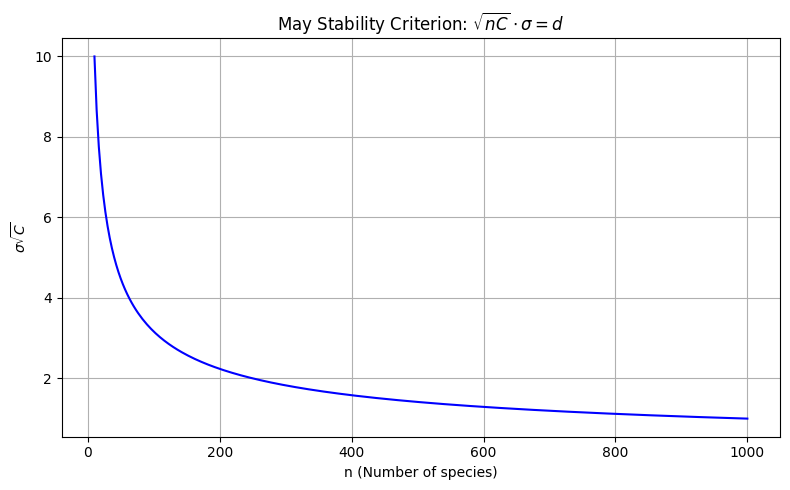

In [153]:
import numpy as np
import matplotlib.pyplot as plt

# משתנים להמחשה בלבד
n = np.linspace(10, 1000, 300)  # מספר המינים
C = 0.1                         # קישוריות קבועה
d = 10                          # ערך קריטי של May

# חישוב σ בהתאם ל: σ = d / sqrt(nC)
sigma_curve = d / np.sqrt(n * C)

# ציור גרף
plt.figure(figsize=(8, 5))
plt.plot(n, sigma_curve, color='blue')
plt.xlabel('n (Number of species)')
plt.ylabel(r'$\sigma \sqrt{C}$')
plt.title('May Stability Criterion: $\sqrt{nC} \cdot \sigma = d$')
plt.grid(True)
plt.tight_layout()
plt.show()
